In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/225Project/

PATH_OF_DATA='/content/drive/MyDrive/225Project/'

 225P.ipynb		    225_report.gdoc			 data_dictionary.csv
'225 Project Report.docx'   airline_passenger_satisfaction.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path = PATH_OF_DATA + 'airline_passenger_satisfaction.csv'

df = pd.read_csv(csv_path)
#clean dateset
data = df.dropna()

# print(df.info)

In [4]:
# have a overview of the satisfaction rate
sat_stat = data.loc[:,"Satisfaction"]
sat_n = 0
unsat_n = 0
for s in sat_stat:
  if s == 'Satisfied':
    sat_n += 1
  else:
    unsat_n += 1

print(sat_n)
print(unsat_n)

56262
73225


In [5]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,37489.781165,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32494.500000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64972.000000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97415.500000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# print(data['Satisfaction'])
# data = data.replace('Male', 1)
# data = data.replace('Female', 0)
# data = data.replace('First-time', 0)
# data = data.replace('Returning', 1)
# data = data.replace('Business', 1)
# data = data.replace('Personal', 0)
# data = data.replace('Economy', 0)
# data = data.replace('Economy Plus', 0)

Sat_data = data[data['Satisfaction'] == "Satisfied"]
Unsat_data = data[data['Satisfaction'] == "Neutral or Dissatisfied"]
First_time_data = data[data['Customer Type'] == "First-time"]
Personal_data = data[data['Type of Travel'] == "Personal"]
Economy_data = data[data['Class'] == "Economy"]
Business_data = data[data['Class'] == "Business"]
print(len(Sat_data[Sat_data['Type of Travel'] == 'Personal']))
print(len(Unsat_data[Unsat_data['Type of Travel'] == 'Personal']))
print(data['Customer Type'])

4055
35987
0         First-time
1          Returning
2          Returning
3          Returning
4          Returning
             ...    
129875     Returning
129876     Returning
129877     Returning
129878     Returning
129879     Returning
Name: Customer Type, Length: 129487, dtype: object


Male
Female
First-time
Returning
Business
Personal
Business
Economy
[28083, 28179, 5688, 50574, 52207, 4055, 43050, 10902]
[35701, 37524, 18026, 55199, 37238, 35987, 18940, 47215]


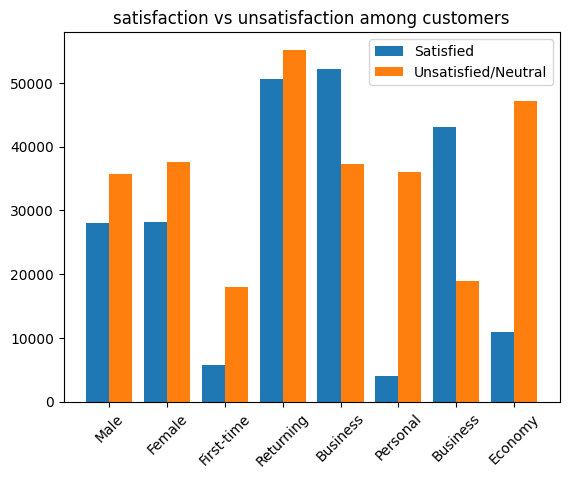

In [7]:

# print(len(Sat_data[Sat_data['Gender'] == 'Female'])/Sat_len)

Sat_info = []
Unsat_info = []
cluster_dic = {'Gender': ['Male','Female'], 'Customer Type':['First-time','Returning'],
               'Type of Travel':['Business','Personal'],'Class':['Business','Economy']}

X = []
barWidth = 0.25
for key in cluster_dic.keys():
  # print(key)
  # print(cluster_dic[key][0])
  for value in cluster_dic[key]:
    print(value)
    X.append(value)
    total_len = len(data[data[key]==value])
    sat_len = len(Sat_data[Sat_data[key]==value])
    unsat_len = len(Unsat_data[Unsat_data[key]==value])
    # sat = round(sat_len/total_len,2)
    # unsat = round(unsat_len/total_len,2)
    sat = sat_len
    unsat = unsat_len
    Sat_info.append(sat)
    Unsat_info.append(unsat)



print(Sat_info)
print(Unsat_info)

X_axis = np.arange(len(Sat_info))

plt.bar(X_axis - 0.2, Sat_info, 0.4, label = 'Satisfied')
plt.bar(X_axis + 0.2, Unsat_info, 0.4, label = 'Unsatisfied/Neutral')

plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
plt.tick_params(axis='x', labelrotation=45)
plt.legend()
plt.title('satisfaction vs unsatisfaction among customers')
plt.show()



In [31]:
import statistics
from scipy.stats import norm
import numpy as np
# fig, axs = plt.subplots(4, 4)
def compare_pdf(d, column,count):
  # print(data[column].describe())

  q1=d[column].quantile(0.25)
  q3=d[column].quantile(0.75)

  IQR=q3-q1

  Low_fence = q1-1.5*IQR
  High_fence = q3 + 1.5*IQR

  sat = Sat_data[column]
  unsat = Unsat_data[column]

  sat_mean = statistics.mean(sat)
  sat_sdv = statistics.stdev(sat)

  unsat_mean = statistics.mean(unsat)
  unsat_sdv = statistics.stdev(unsat)

  print(sat_mean,sat_sdv)
  print(unsat_mean,unsat_sdv)

  if column == 'Customer Type':
    x_axis = np.linspace(min(data[column].values), max(data[column].values), 10)
  else:
    x_axis = np.linspace(max(0,Low_fence),min(High_fence,data[column].max()),10)

  plt.plot(x_axis, norm.pdf(x_axis, sat_mean, sat_sdv),'red',label = 'Satisfied')
  plt.plot(x_axis, norm.pdf(x_axis, unsat_mean, unsat_sdv),'blue',label = 'Unsatisfied/Neutrual')
  plt.title(column)
  plt.legend()
  plt.savefig(f'plot_{count+1}.png')
  plt.show()
  count += 1

columns = data.columns
count = 0
# for head in columns[9:22]:
#   # print(head)
#   compare_pdf(data,head,count)
#   count += 1
# compare_pdf('Ease of Online Booking')

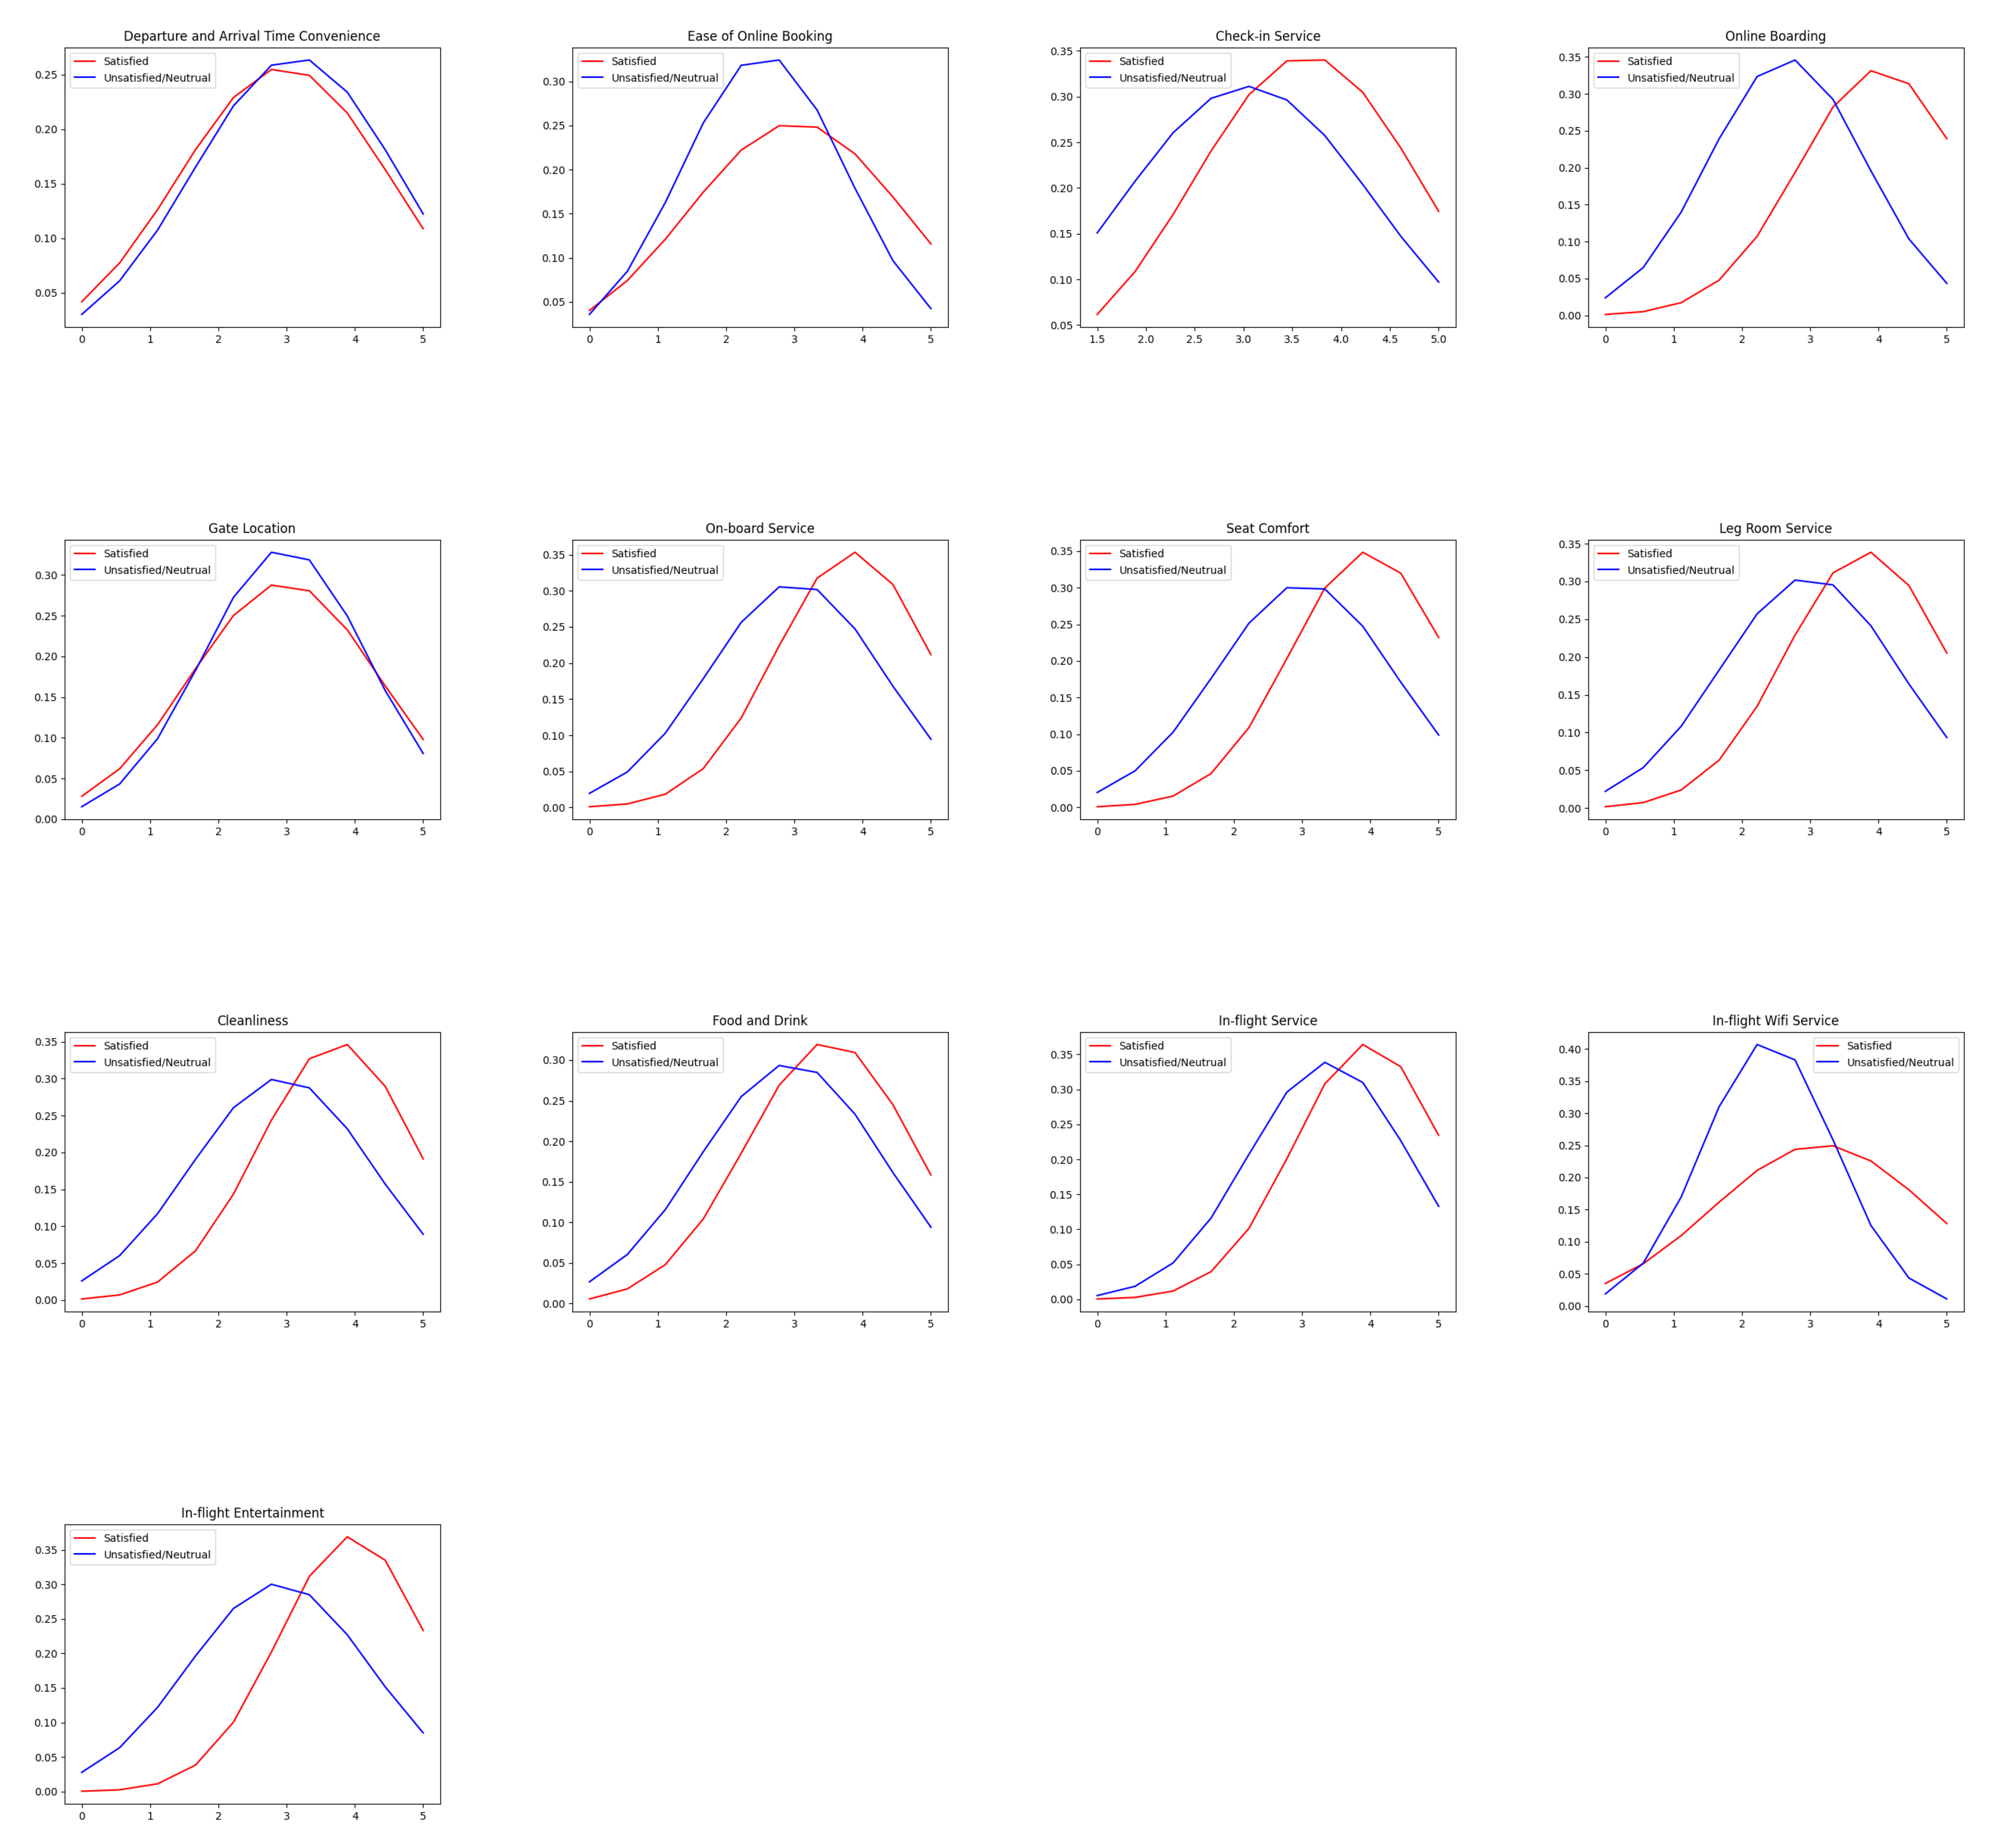

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(50, 50))

for i, ax in enumerate(axes.flatten()):
    if i > 12: break
    img = plt.imread(f'plot_{i+1}.png')  # Load the saved plot
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels

# Adjust layout to prevent overlapping titles
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    if i > 12:
        fig.delaxes(ax)  # Delete the last subplot

# Show the grid of saved plots
plt.savefig(f'MD.png')
plt.show()

In [10]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Create features and target
X = data[columns[9:22]]
first_time_X = First_time_data[columns[9:22]]
personal_X = Personal_data[columns[9:22]]
economy_X = Economy_data[columns[9:22]]
business_X = Business_data[columns[9:22]]

# print(X)

y = data['Satisfaction']
first_time_y = First_time_data['Satisfaction']
personal_y = Personal_data['Satisfaction']
economy_y = Economy_data['Satisfaction']
business_y = Business_data['Satisfaction']

# Convert to categorical data by converting data to integers
# X = X.astype(int)

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 4)
X_kbest_features = chi2_features.fit_transform(X, y)
Chi_score = chi2(X,y)
first_chi_score = chi2(first_time_X,first_time_y)
personal_chi_score = chi2(personal_X,personal_y)
economy_chi_score = chi2(economy_X,economy_y)
business_chi_score = chi2(business_X, business_y)
# print(Chi_score)



# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])


Original feature number: 13
Reduced feature number: 4


Departure and Arrival Time Convenience :  292.77528925545704
Ease of Online Booking :  2626.3917643837653
Check-in Service :  3530.917010536631
Online Boarding :  18273.12225801452
Gate Location :  0.6073735946590304
On-board Service :  6586.7731613553715
Seat Comfort :  7955.338266609604
Leg Room Service :  6538.7626239757465
Cleanliness :  6403.763378987521
Food and Drink :  3186.5332147613844
In-flight Service :  2954.8501992043143
In-flight Wifi Service :  6729.166336091863
In-flight Entertainment :  10890.22939549977


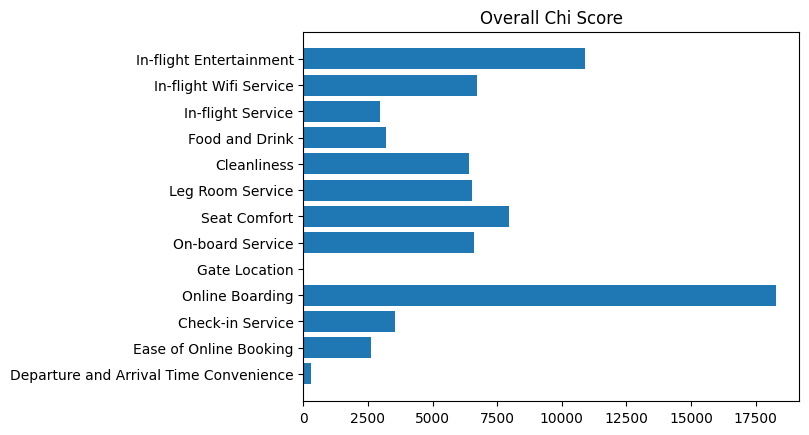

In [11]:
for i in range(13):
  print(columns[i+9], ": ", Chi_score[0][i])
# print(X_kbest_features)
plt.barh(columns[9:22],Chi_score[0])
# plt.tick_params(axis='x', labelrotation=90)
plt.title('Overall Chi Score')
plt.show()

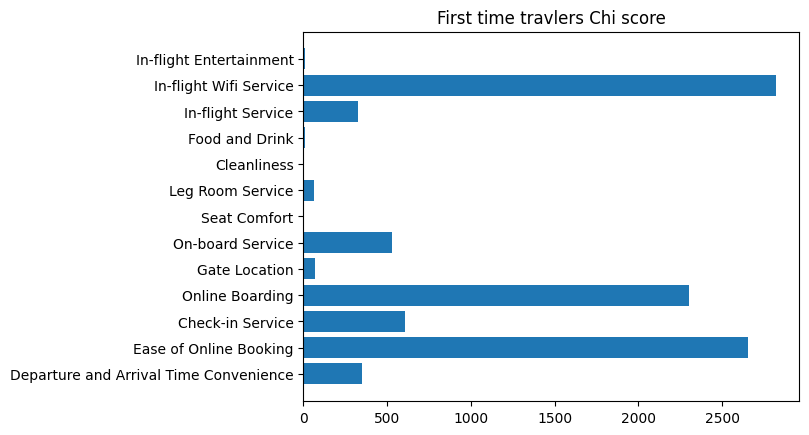

In [12]:
plt.barh(columns[9:22],first_chi_score[0])
plt.title('First time travlers Chi score')
plt.show()

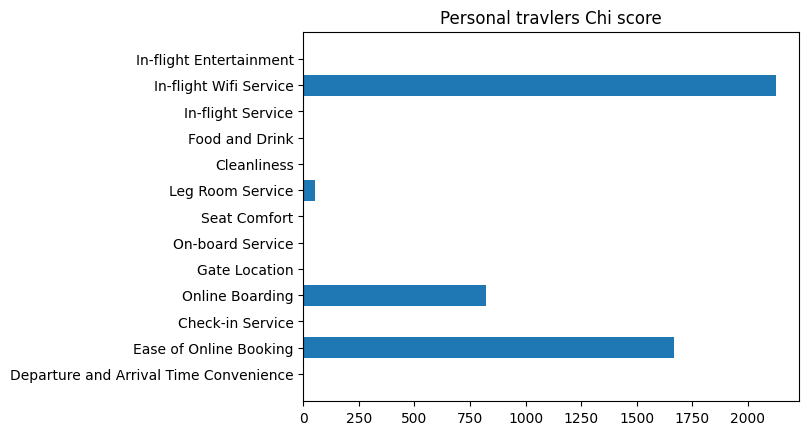

In [13]:
plt.barh(columns[9:22],personal_chi_score[0])
plt.title('Personal travlers Chi score')
plt.show()

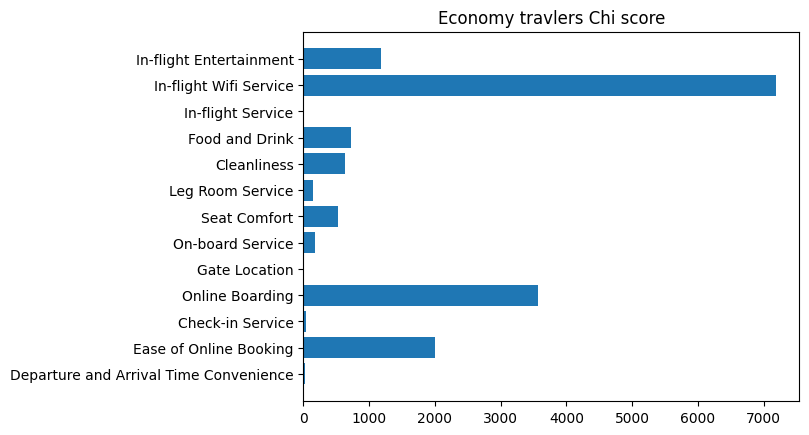

In [14]:
plt.barh(columns[9:22],economy_chi_score[0])
plt.title('Economy travlers Chi score')
plt.show()

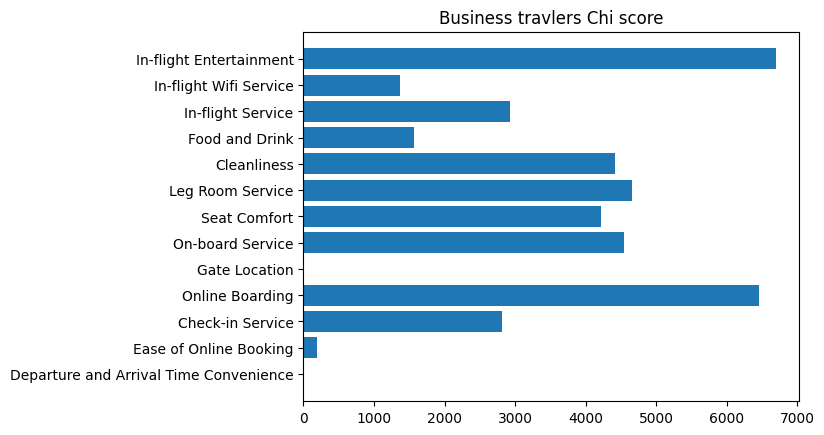

In [15]:
plt.barh(columns[9:22],business_chi_score[0])
plt.title('Business travlers Chi score')
plt.show()

In [16]:
# data clean
data_train = data.copy()

# print(data_train['Gender'])

data_train = data_train.replace('Male', 1)
data_train = data_train.replace('Female', 0)
data_train = data_train.replace('First-time', 1)
data_train = data_train.replace('Returning', 0)
data_train = data_train.replace('Business', 1)
data_train = data_train.replace('Personal', 0)
data_train = data_train.replace('Economy', 0)
data_train = data_train.replace('Economy Plus', 0)

print(data_train['Customer Type'])


0         1
1         0
2         0
3         0
4         0
         ..
129875    0
129876    0
129877    0
129878    0
129879    0
Name: Customer Type, Length: 129487, dtype: int64


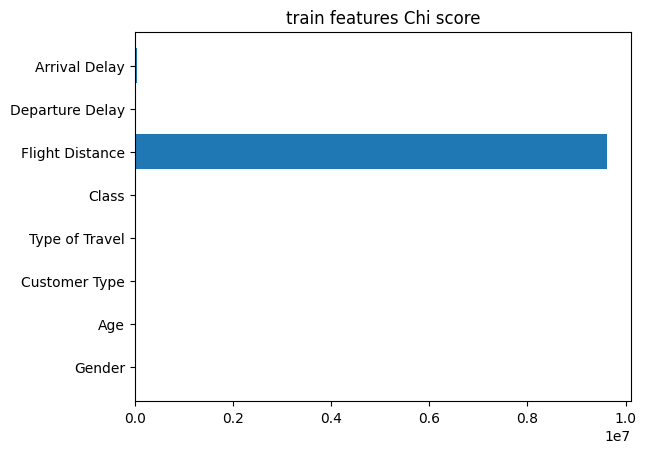

[8.68336496e+00 1.34769764e+04 3.65637588e+03 8.10107888e+03
 1.70505342e+04 9.62741295e+06 3.31352201e+04 4.31134911e+04]


In [17]:
chi_X = data_train[columns[1:9]]
chi_y = data_train['Satisfaction']
train_Chi_score = chi2(chi_X,chi_y)

plt.barh(columns[1:9],train_Chi_score[0])
plt.title('train features Chi score')
plt.show()

print(train_Chi_score[0])

In [18]:

def compare_pdf(d, column,count):
  # print(data[column].describe())

  q1=d[column].quantile(0.25)
  q3=d[column].quantile(0.75)

  IQR=q3-q1

  Low_fence = q1-1.5*IQR
  High_fence = q3 + 1.5*IQR

  # print(Sat_data[column])

  if column == 'Departure Delay' or column == 'Arrival Delay':
    # print(Sat_data[column])
    sat = Sat_data[(Sat_data[column]>Low_fence) & (Sat_data[column]<High_fence)]
    unsat = Unsat_data[(Unsat_data[column]>Low_fence) & (Unsat_data[column]<High_fence)]
    sat = sat[column]
    unsat = unsat[column]

  else:
    sat = Sat_data[column]
    unsat = Unsat_data[column]

  sat_mean = statistics.mean(sat)
  sat_sdv = statistics.stdev(sat)

  unsat_mean = statistics.mean(unsat)
  unsat_sdv = statistics.stdev(unsat)

  print(sat_mean,sat_sdv)
  print(unsat_mean,unsat_sdv)

  if column == 'Customer Type':
    x_axis = np.linspace(min(data[column].values), max(data[column].values), 10)
  else:
    x_axis = np.linspace(max(0,Low_fence),min(High_fence,data[column].max()),10)

  plt.plot(x_axis, norm.pdf(x_axis, sat_mean, sat_sdv),'red',label = 'Satisfied')
  plt.plot(x_axis, norm.pdf(x_axis, unsat_mean, unsat_sdv),'blue',label = 'Unsatisfied/Neutrual')
  plt.title(column)
  plt.legend()
  plt.savefig(f'plot_{count+1}.png')
  plt.show()
  count += 1


In [30]:
data = data.replace('Male', 1)
data = data.replace('Female', 0)
data = data.replace('First-time', 0)
data = data.replace('Returning', 1)
data = data.replace('Business', 1)
data = data.replace('Personal', 0)
data = data.replace('Economy', 0)
data = data.replace('Economy Plus', 0)

Sat_data = data[data['Satisfaction'] == "Satisfied"]
Unsat_data = data[data['Satisfaction'] == "Neutral or Dissatisfied"]

count = 0
# for head in columns[1:9]:
#   # print(head)
#   compare_pdf(data_train,head,count)
#   count += 1

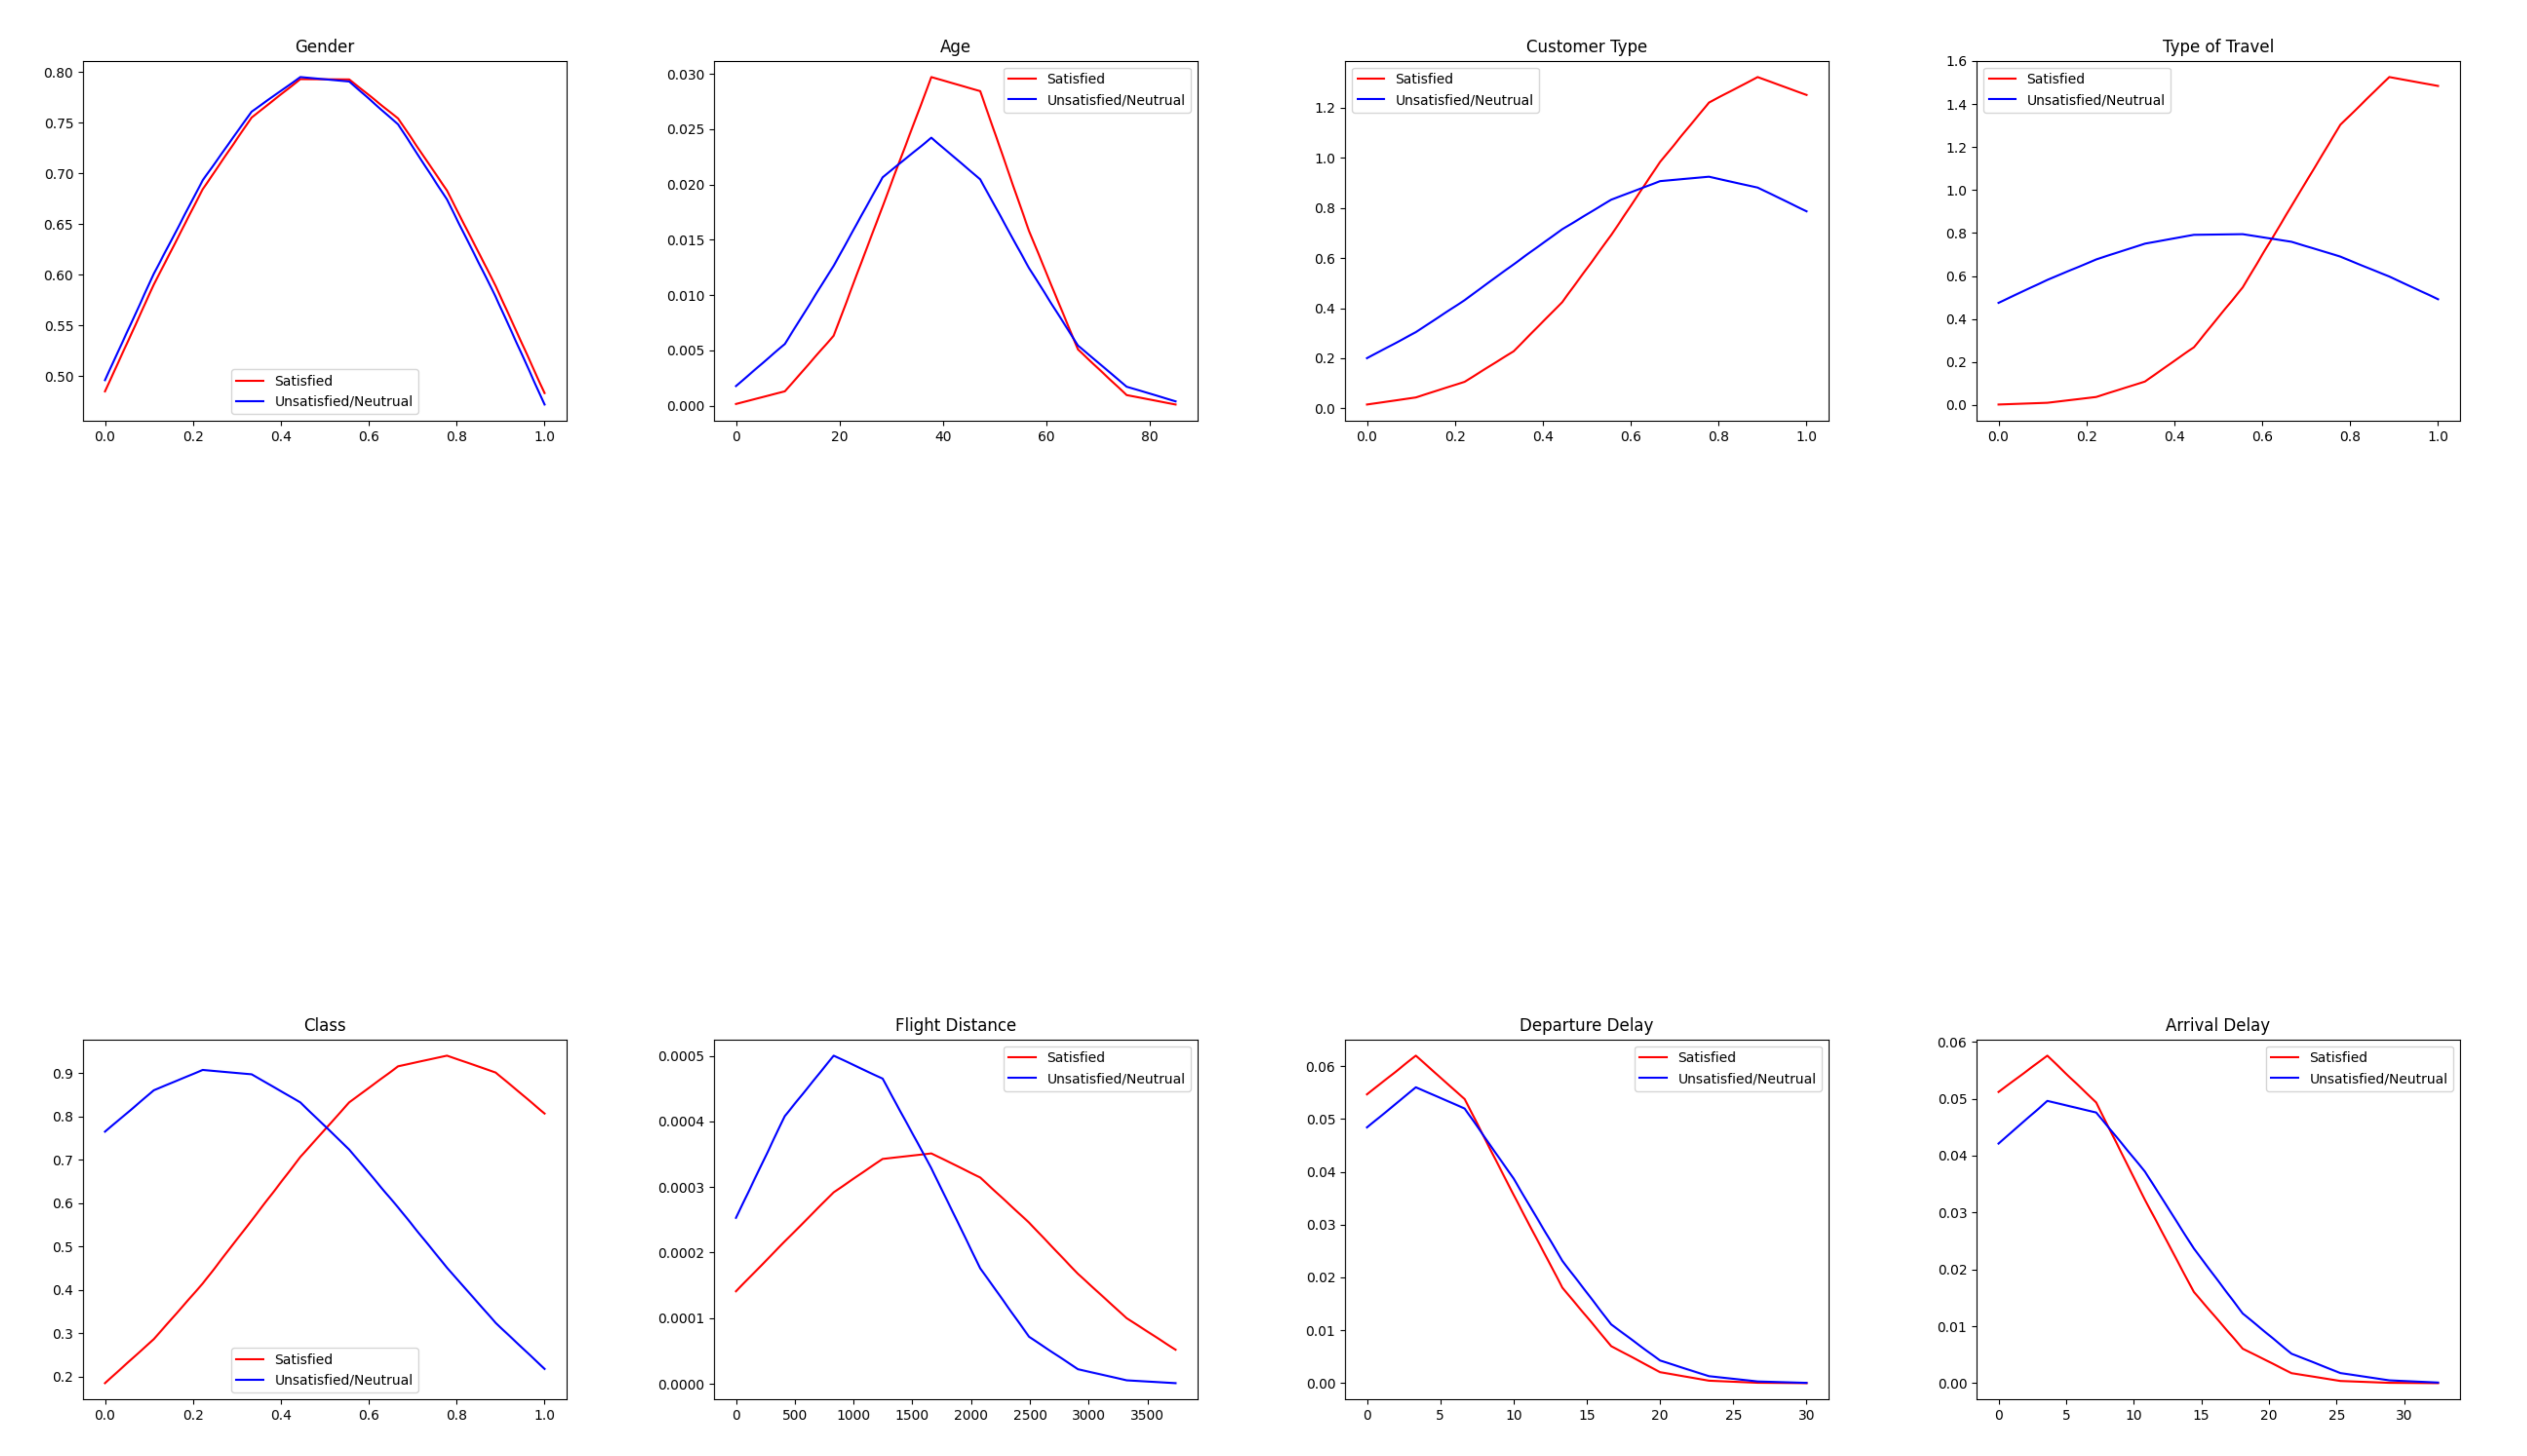

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(50, 50))

for i, ax in enumerate(axes.flatten()):
    if i > 12: break
    img = plt.imread(f'plot_{i+1}.png')  # Load the saved plot
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels

# Adjust layout to prevent overlapping titles
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    if i > 12:
        fig.delaxes(ax)  # Delete the last subplot

# Show the grid of saved plots
plt.savefig(f'train_MD.png')
plt.show()

In [21]:
data_pca = data_train.copy()
import numpy as np
from sklearn.decomposition import PCA
data_p = data_pca.iloc[:,[6,8]]

# Initialize PCA with the number of components you want
pca = PCA(n_components=1)

# Fit and transform the data
transformed_data = pca.fit_transform(data_p)

data_pca[columns[2]] = transformed_data
# The transformed_data now contains the principal components
print(transformed_data)

print(data_pca[columns[2]])

[[-369.20990717]
 [-369.2124472 ]
 [-337.20953373]
 ...
 [-853.21057818]
 [-853.21117583]
 [-853.20953229]]
0         -369.209907
1         -369.212447
2         -337.209534
3          714.790463
4         2279.790384
             ...     
129875    -743.209757
129876    -882.209532
129877    -853.210578
129878    -853.211176
129879    -853.209532
Name: Age, Length: 129487, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# X_train, X_test, y_train, y_test = train_test_split(data_pca[columns[2:5]], data['Satisfaction'], test_size=0.2,random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(data_pca.iloc[:, [2,3,4,5]], data['Satisfaction'], test_size=0.2,random_state = 42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7863541586222874


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(data_train[columns[2:7]], data['Satisfaction'], test_size=0.2,random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(data_train.iloc[:, [2,3,4,5]], data['Satisfaction'], test_size=0.2,random_state = 42)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.790099621592401


In [24]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.790099621592401


In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# X_train, X_test, y_train, y_test = train_test_split(data_train[columns[2:7]], data['Satisfaction'], test_size=0.2,random_state = 42)
# # X_train, X_test, y_train, y_test = train_test_split(data_train.iloc[:, [2,3,4,5,6,8]], data['Satisfaction'], test_size=0.2,random_state = 42)

# X_train, X_test, y_train, y_test = train_test_split(data_pca[columns[2:5]], data['Satisfaction'], test_size=0.2,random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(data_pca.iloc[:, [2,3,4,5,7]], data['Satisfaction'], test_size=0.2,random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7824928565912426


In [27]:
# cross validation

from sklearn.model_selection import cross_val_score

k_values = [1,3,5,7,9,11,13,15,17,19,21,23,25]
scores = []
X = data_train[columns[2:6]]
y = data['Satisfaction']

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

print(max(scores))

1
3
5
7
9
11
13
15
17
19
21
23
25
0.7918640748446026


[0.6894679667340742, 0.7277345439946334, 0.7495669009350928, 0.7612203206037421, 0.7715380202209128, 0.7757777346222733, 0.7828207137423494, 0.7904045694746941, 0.7899952586366064, 0.7905435605429689, 0.7914239233904318, 0.7918640748446026, 0.7915551590521404]


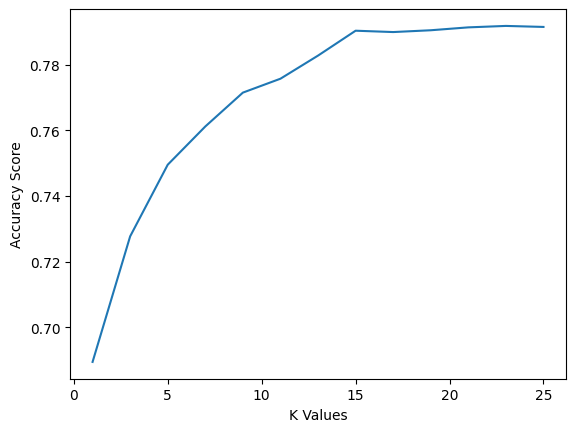

In [28]:
plt.plot(k_values, scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
print(scores)

Accuracy: 0.7824928565912426
11357 3328
0.7733741913517195


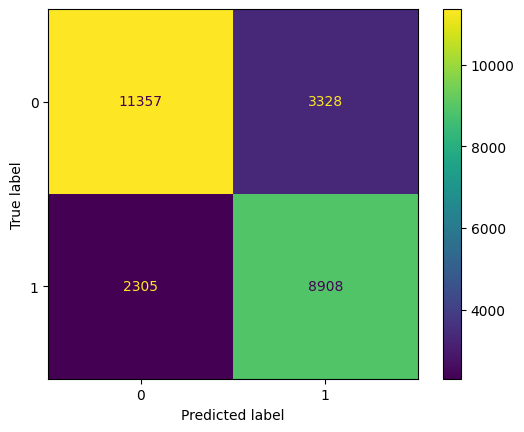

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(tn,fp)
print(specificity)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()